In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings('ignore')      # Ignore warnings

print('Setup Completed')

Setup Completed


In [2]:
df = pd.read_csv('PJME_hourly.csv', parse_dates=True, index_col='Datetime')
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [3]:
df.head(5)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [4]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [5]:
df.isnull().sum()

PJME_MW    0
dtype: int64

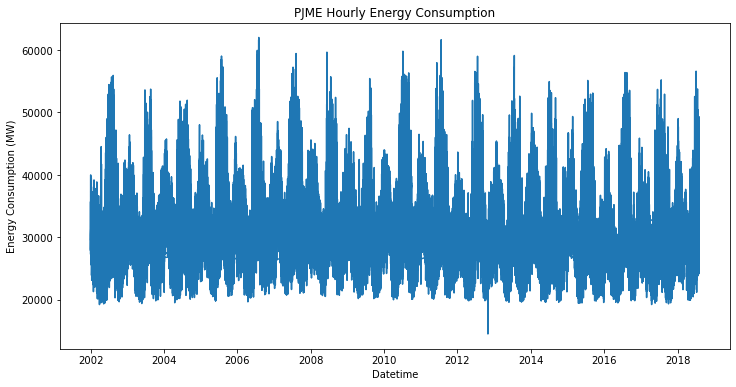

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['PJME_MW'])
plt.title('PJME Hourly Energy Consumption')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.show()

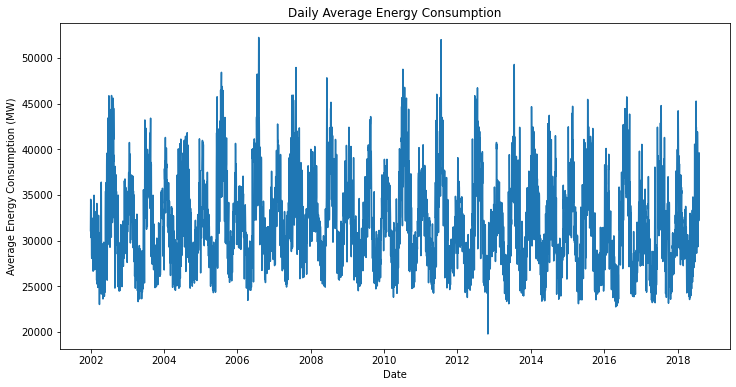

In [7]:
daily_data = df['PJME_MW'].resample('D').mean()
plt.figure(figsize=(12,6))
plt.plot(daily_data)
plt.title('Daily Average Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Average Energy Consumption (MW)')
plt.show()

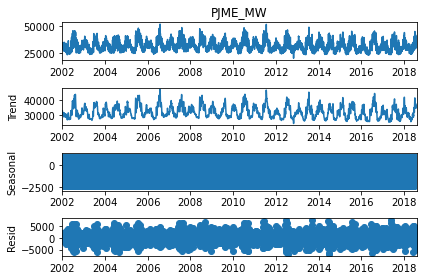

In [8]:
# Decompose the daily time series
decomposition = seasonal_decompose(daily_data, model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()

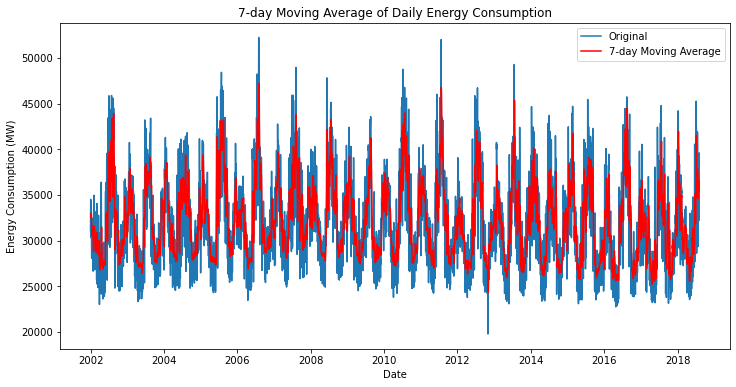

In [9]:
moving_avg = daily_data.rolling(window=7).mean()
plt.figure(figsize=(12,6))
plt.plot(daily_data, label='Original')
plt.plot(moving_avg, color='red', label='7-day Moving Average')
plt.title('7-day Moving Average of Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()

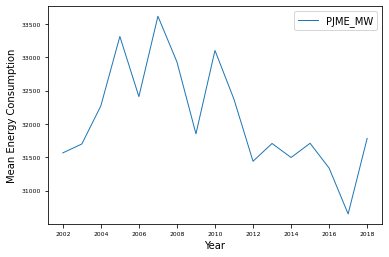

<Figure size 1080x576 with 0 Axes>

In [10]:
consumpation_by_year = df.groupby(df.index.year).mean()

# Plot the mean for each year
ax = consumpation_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Mean Energy Consumption')
ax.legend(fontsize=10)
plt.figure(figsize=(15, 8))
plt.show()

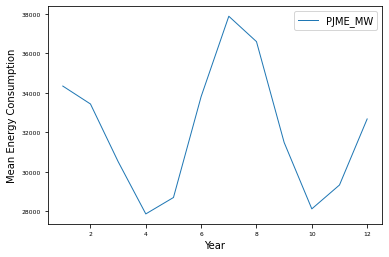

<Figure size 1080x576 with 0 Axes>

In [11]:
# Compute the mean for each year
consumpation_by_month = df.groupby(df.index.month).mean()

# Plot the mean for each year
ax = consumpation_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Mean Energy Consumption')
ax.legend(fontsize=10)
plt.figure(figsize=(15, 8))
plt.show()

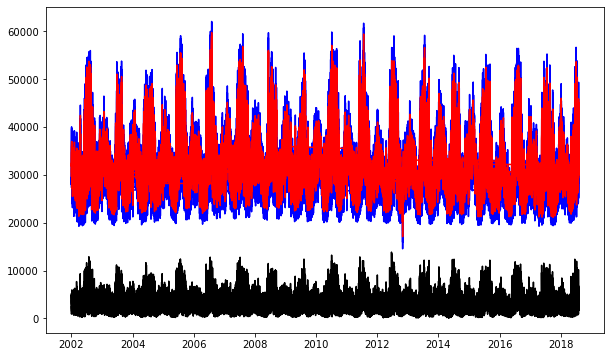

In [12]:
rolling_mean = df['PJME_MW'].rolling(window=12).mean()
rolling_std = df['PJME_MW'].rolling(window=12).std()

# plotting the original data along Rolling
plt.figure(figsize=(10, 6))
plt.plot(df['PJME_MW'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')

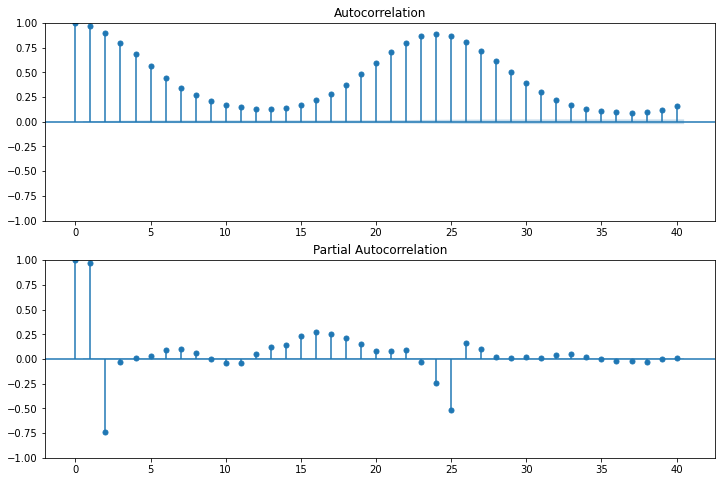

In [13]:
# Check stationarity and determine d
result = adfuller(df['PJME_MW'])
d = 0
if result[1] > 0.05:
    d = 1

# Differencing if needed
if d > 0:
    differenced_series = df['PJME_MW'].diff().dropna()
else:
    differenced_series = df['PJME_MW']

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
tsaplots.plot_acf(differenced_series, lags=40, ax=ax1)
tsaplots.plot_pacf(differenced_series, lags=40, ax=ax2)
plt.show()

In [14]:
train = df[df.index < '2014-01-01']
test = df[(df.index > '2014-01-01') | (df.index == '2014-01-01')]


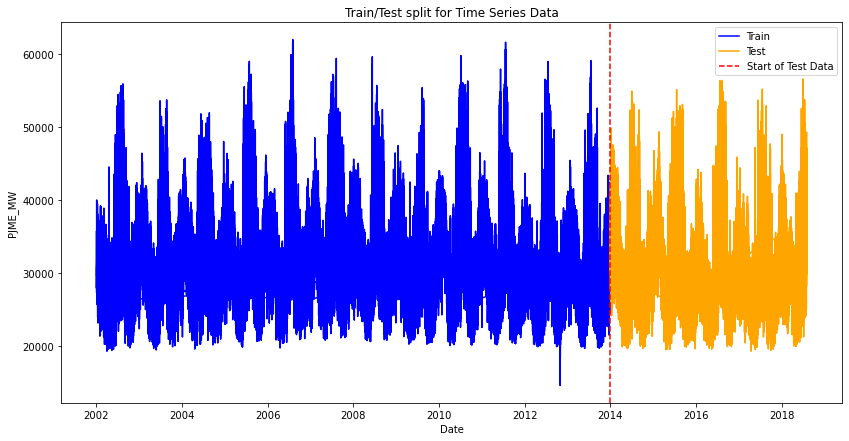

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['PJME_MW'], label='Train', color='blue')

# Plot the testing data
plt.plot(test.index, test['PJME_MW'], label='Test', color='orange')

# Add a vertical line at the boundary between the train and test datasets
plt.axvline(x=pd.to_datetime('2014-01-01'), color='red', linestyle='--', label='Start of Test Data')

# Add some labels and a legend
plt.xlabel('Date')
plt.ylabel('PJME_MW') # Replace 'Values' with the appropriate label for your data
plt.title('Train/Test split for Time Series Data')
plt.legend()

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['PJME_MW'],order=(2,1,4))
model_fit=model.fit()
model_fit.summary()

In [20]:
 import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train['PJME_MW'],order=(0,1,0),seasonal_order=(1,1,1,12))

In [21]:
results = model.fit()
results.summary()

MemoryError: Unable to allocate 542. MiB for an array with shape (26, 26, 105166) and data type float64

In [19]:
test['prediction'] = results.predict()
df[['PJME_MW','prediction']].plot(figsize=(12,8))

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
rmse=np.sqrt(mean_squared_error(df['PJME_MW'],df['prediction']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

In [ ]:
score = np.sqrt(mean_squared_error(df['PJME_MW'], df['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')